<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Fuji_descent_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Visualization**

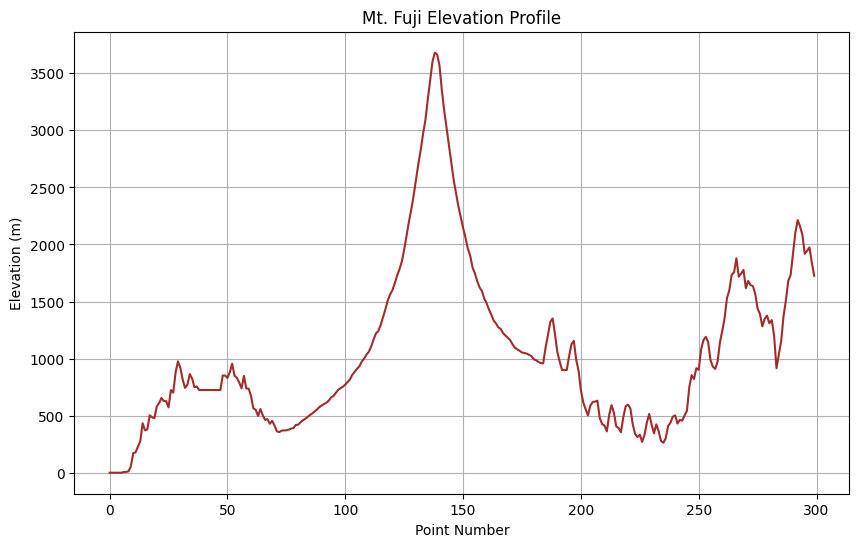

In [1]:
import numpy as np

csv_path = "mtfuji_data.csv"  # Path to your downloaded file
np.set_printoptions(suppress=True)  # Avoid scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

import matplotlib.pyplot as plt

# Extracting point numbers and elevations
point_numbers = fuji[:, 0]
elevations = fuji[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(point_numbers, elevations, color='brown')
plt.title("Mt. Fuji Elevation Profile")
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.grid(True)
plt.show()

**Creating a function to calculate the gradient at a certain point**

In [6]:
def calculate_gradient(fuji, current_point):
    """
    Calculate the gradient between the current point and the previous point.

    Parameters:
        fuji (ndarray): The elevation dataset.
        current_point (int): Index of the current point (must be > 0).

    Returns:
        float: The gradient (slope) at the current point.
    """
    if current_point <= 0 or current_point >= len(fuji):
        raise ValueError("current_point must be between 1 and len(fuji)-1")

    y_current = fuji[current_point, 3]  # Elevation at current point
    y_prev = fuji[current_point - 1, 3]  # Elevation at previous point
    x_current = fuji[current_point, 0]  # Point number
    x_prev = fuji[current_point - 1, 0]  # Previous point number

    gradient = (y_current - y_prev) / (x_current - x_prev)
    return gradient

point = 115
grad = calculate_gradient(fuji, point)
print(f"Gradient at point {point}: {grad:.4f}")

Gradient at point 115: 52.5500


**Calculating the destination point**

In [7]:
def calculate_next_point(fuji, current_point, alpha=0.2):
    """
    Calculate the next point to move to based on the gradient at the current point.

    Parameters:
        fuji (ndarray): The elevation dataset.
        current_point (int): Index of the current point.
        alpha (float): Learning rate (hyperparameter).

    Returns:
        int: The next point index (rounded and validated).
    """
    # Ensuring current_point is valid
    if current_point <= 0 or current_point >= len(fuji):
        raise ValueError("current_point must be between 1 and len(fuji)-1")

    # Getting gradient from previous function
    gradient = calculate_gradient(fuji, current_point)

    # Computing next point using gradient descent formula
    next_point = current_point - alpha * gradient

    # Rounding to nearest integer
    next_point = int(round(next_point))

    # Clamping to valid range
    next_point = max(0, min(next_point, len(fuji) - 1))

    return next_point

current = 115
next_p = calculate_next_point(fuji, current, alpha=0.2)
print(f"Next point from {current} is {next_p}")



Next point from 115 is 104


**Creating a function to go down the mountain**

In [8]:
def descend_mt_fuji(fuji, start_point=136, alpha=0.2):
    """
    Simulate descending Mt. Fuji using gradient descent.

    Parameters:
        fuji (ndarray): Elevation dataset.
        start_point (int): Starting index (default is 136).
        alpha (float): Learning rate (descent rate).

    Returns:
        list: Sequence of visited point indices during descent.
    """
    path = [start_point]
    current_point = start_point

    while True:
        next_point = calculate_next_point(fuji, current_point, alpha)

        # Stop if no movement
        if next_point == current_point:
            break

        path.append(next_point)
        current_point = next_point

    return path

descent_path = descend_mt_fuji(fuji, start_point=136, alpha=0.2)
print("Descent path:", descent_path)
print("Number of steps:", len(descent_path))

Descent path: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
Number of steps: 14


**Visualization of the descent process**

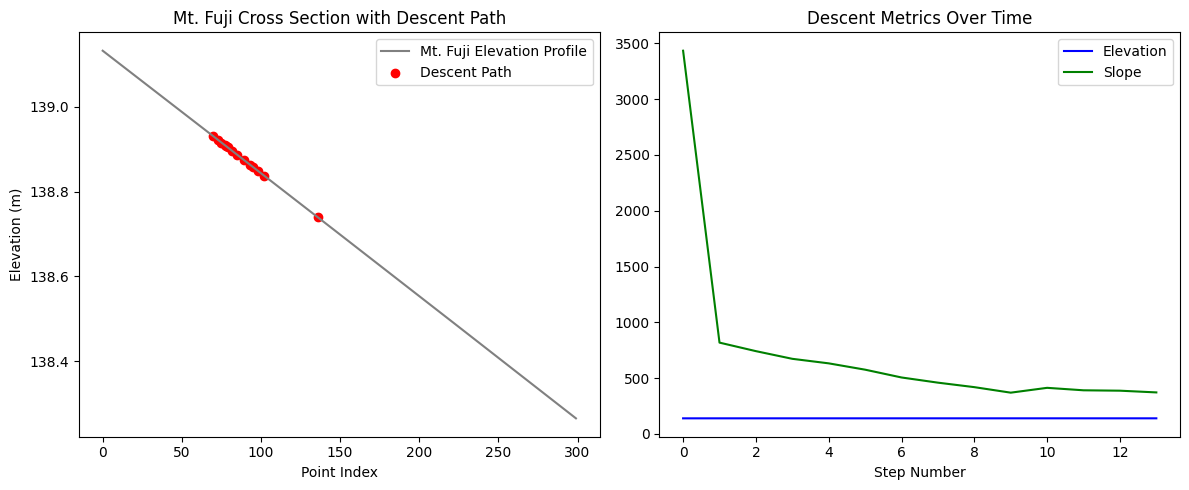

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_descent(fuji, descent_path):
    # Extract elevation and slope data
    elevations = fuji[:, 2]
    slopes = fuji[:, 3]

    # Get data for descent path
    descent_elevations = [elevations[i] for i in descent_path]
    descent_slopes = [slopes[i] for i in descent_path]

    # --- Plot 1: Cross-sectional view ---
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(elevations, label="Mt. Fuji Elevation Profile", color='gray')
    plt.scatter(descent_path, descent_elevations, color='red', label="Descent Path")
    plt.xlabel("Point Index")
    plt.ylabel("Elevation (m)")
    plt.title("Mt. Fuji Cross Section with Descent Path")
    plt.legend()

    # --- Plot 2: Altitude and slope over time ---
    steps = list(range(len(descent_path)))

    plt.subplot(1, 2, 2)
    plt.plot(steps, descent_elevations, label="Elevation", color='blue')
    plt.plot(steps, descent_slopes, label="Slope", color='green')
    plt.xlabel("Step Number")
    plt.title("Descent Metrics Over Time")
    plt.legend()

    plt.tight_layout()
    plt.show()

descent_path = descend_mt_fuji(fuji, start_point=136, alpha=0.2)
visualize_descent(fuji, descent_path)

Change of Initial value

In [15]:
def calculate_next_point(fuji, current_point, alpha=0.2):
    """
    Calculate the next point using gradient descent.

    Parameters:
        fuji (ndarray): Elevation dataset.
        current_point (int): Current index.
        alpha (float): Learning rate.

    Returns:
        int: Next point index.
    """
    # Handle edge cases
    if current_point == 0:
        gradient = fuji[current_point + 1][2] - fuji[current_point][2]
    elif current_point == len(fuji) - 1:
        gradient = fuji[current_point][2] - fuji[current_point - 1][2]
    else:
        gradient = (fuji[current_point + 1][2] - fuji[current_point - 1][2]) / 2

    # Gradient descent step
    next_point = current_point - round(alpha * gradient)

    # Clamp to valid range
    next_point = max(0, min(len(fuji) - 1, next_point))

    return next_point

import numpy as np

fuji = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)

print("Summit descent path:", path_summit)
print("Base descent path:", path_base)
print("Mid-slope descent path:", path_mid)

Summit descent path: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
Base descent path: [1]
Mid-slope descent path: [70, 78, 77, 75]


**Visualization of the descent process for each initial value**

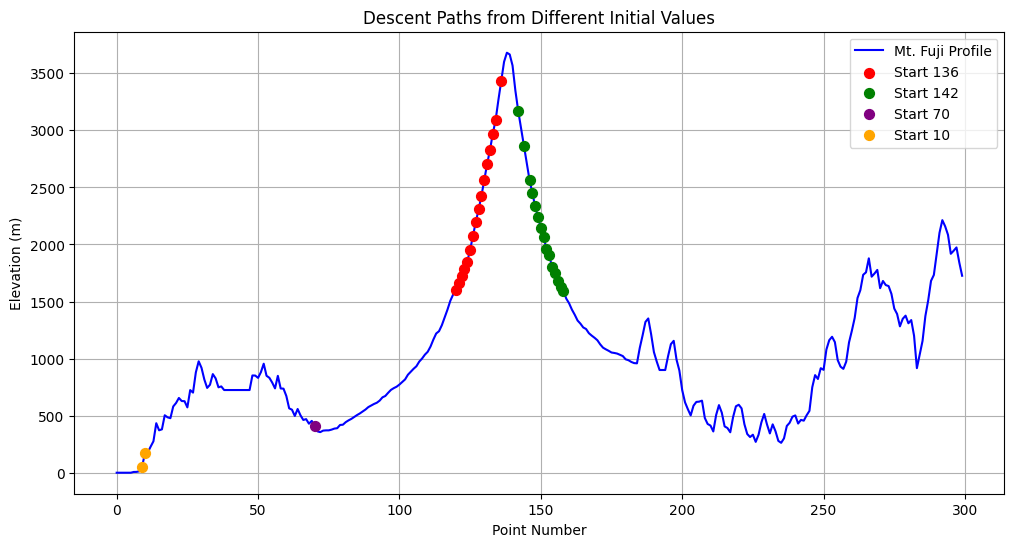

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data ---
csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Gradient Descent Functions ---

def calculate_gradient(fuji_data, current_point):
    """Calculates the gradient between the current and previous point."""
    if current_point <= 0:
        return 0
    y1 = fuji_data[current_point - 1, 3]
    y2 = fuji_data[current_point, 3]
    x1 = fuji_data[current_point - 1, 0]
    x2 = fuji_data[current_point, 0]
    if x2 - x1 == 0:
        return 0
    return (y2 - y1) / (x2 - x1)

def calculate_next_point(fuji, current_point, alpha=0.2):
    """Calculates the next point to move to using gradient descent."""
    if current_point <= 0 or current_point >= len(fuji):
        return None
    gradient = calculate_gradient(fuji, current_point)
    next_point_float = current_point - alpha * gradient
    next_point = int(np.round(next_point_float))
    if 0 <= next_point < len(fuji):
        return next_point
    return None

def descend_mt_fuji(fuji, start_point, alpha=0.2):
    """Simulates a descent from a starting point."""
    path = [start_point]
    current_point = start_point
    while True:
        next_point = calculate_next_point(fuji, current_point, alpha)
        if next_point is None or next_point == current_point:
            break
        path.append(next_point)
        current_point = next_point
    return path

# Visualization Function

def plot_multiple_descents(fuji, start_points, alpha=0.01):
    """Visualizes the descent paths from multiple starting points."""
    elevations = fuji[:, 3]

    plt.figure(figsize=(12, 6))

    # Plot the full mountain profile as a line
    plt.plot(fuji[:, 0], elevations, color='blue', label='Mt. Fuji Profile')

    colors = ['red', 'green', 'purple', 'orange']
    for start, color in zip(start_points, colors):
        path = descend_mt_fuji(fuji, start_point=start, alpha=alpha)
        descent_elevations = [elevations[i] for i in path]

        # Plot the descent path points as dots
        plt.scatter(path, descent_elevations, color=color, label=f"Start {start}", s=50, zorder=5)

    plt.xlabel("Point Number")
    plt.ylabel("Elevation (m)")
    plt.title("Descent Paths from Different Initial Values")
    plt.legend()
    plt.grid(True)
    plt.show()

# Define a list of initial points to start the descent from
initial_points = [136, 142, 70, 10]

plot_multiple_descents(fuji, start_points=initial_points, alpha=0.01)

**Hyperparameter changes**

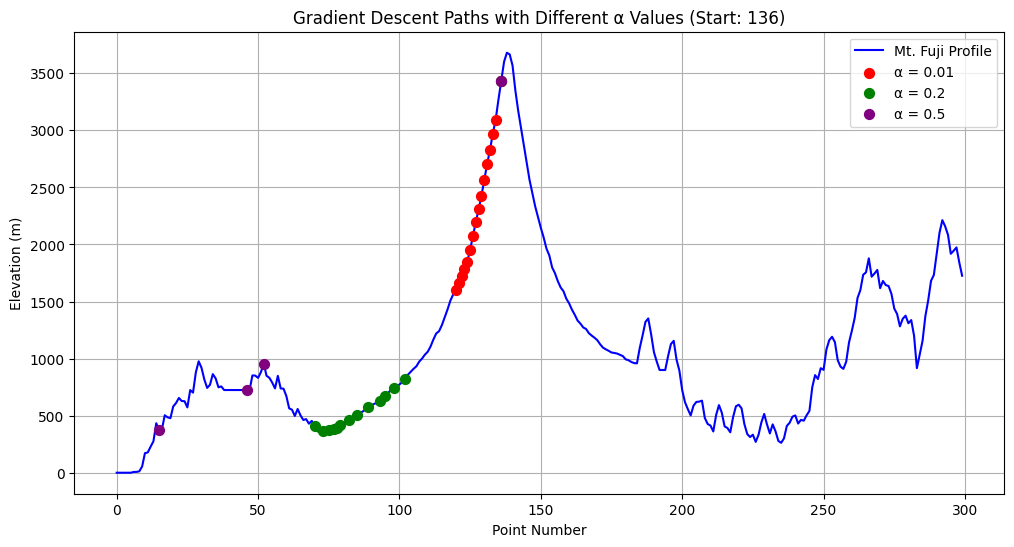

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Loading Data
csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Gradient descent functions
def calculate_gradient(fuji_data, current_point):
    if current_point <= 0:
        return 0
    y1 = fuji_data[current_point - 1, 3]
    y2 = fuji_data[current_point, 3]
    x1 = fuji_data[current_point - 1, 0]
    x2 = fuji_data[current_point, 0]
    if x2 - x1 == 0:
        return 0
    return (y2 - y1) / (x2 - x1)

def calculate_next_point(fuji, current_point, alpha):
    if current_point <= 0 or current_point >= len(fuji):
        return None
    gradient = calculate_gradient(fuji, current_point)
    next_point_float = current_point - alpha * gradient
    next_point = int(np.round(next_point_float))
    if 0 <= next_point < len(fuji):
        return next_point
    return None

def descend_mt_fuji(fuji, start_point, alpha):
    path = [start_point]
    current_point = start_point
    while True:
        next_point = calculate_next_point(fuji, current_point, alpha)
        if next_point is None or next_point == current_point:
            break
        path.append(next_point)
        current_point = next_point
    return path

# Visualization Function
def plot_alpha_descents(fuji, start_point, alphas):
    elevations = fuji[:, 3]

    plt.figure(figsize=(12, 6))

    # Plot the full mountain profile as a line
    plt.plot(fuji[:, 0], elevations, color='blue', label='Mt. Fuji Profile')

    colors = ['red', 'green', 'purple']
    for alpha, color in zip(alphas, colors):
        path = descend_mt_fuji(fuji, start_point, alpha)
        descent_elevations = [elevations[i] for i in path]

        # Plot the descent path points as dots
        plt.scatter(path, descent_elevations, color=color, label=f"α = {alpha}", s=50, zorder=5)

    plt.xlabel("Point Number")
    plt.ylabel("Elevation (m)")
    plt.title(f"Gradient Descent Paths with Different α Values (Start: {start_point})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Same starting point for all descents
starting_point = 136

# Different alpha values to demonstrate their effect
alpha_values = [0.01, 0.2, 0.5]

plot_alpha_descents(fuji, start_point=starting_point, alphas=alpha_values)